# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE scores have a wider range of values than GPA scores.

#### Question 4. Drop data points with missing data


In [6]:
df_1 = pd.read_csv("../assets/admissions.csv")

df_1 = df_1.dropna()

In [7]:
df_1.isnull().sum()

#GRE and GPA have 2 null values and prestige has 1 null value.

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [8]:
df_1.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


#### Question 6. Create box plots for GRE and GPA

In [9]:
df_1.gre.quantile (0.25)

520.0

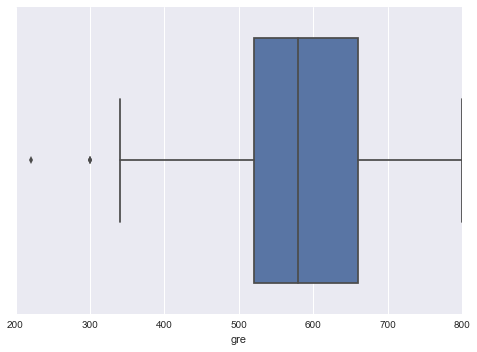

In [10]:
#boxplot 1

import seaborn as sns 

plt = sns.boxplot("gre", data=df_1)

#plt.text(x=0.25, y=31.25, s="3rd Quartile")
#plt.text(x=-.2, y=26.75, s="Median")
#plt.text(x=0.520, y=21.5, s="1st Quartile")
#plt.text(x=-0.1, y=20, s="Min")
#plt.text(x=-0.1, y=34.5, s="Max")
#plt.text(x=0.45, y=27.5, s="IQR", rotation=90, size=25);

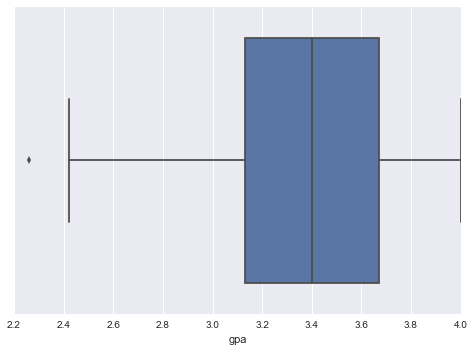

In [11]:
#boxplot 2 

plt = sns.boxplot("gpa", data=df_1)

#### Question 7. What do this plots show?

Answer: It shows the GRE median is 580, first quartile is 340, min is 340, max is 800.

GPA:
median:3.39
min: 2.41
max: 4.0
first quartile: 2.41
third quartile: 3.68

#### Question 8. Describe each distribution 

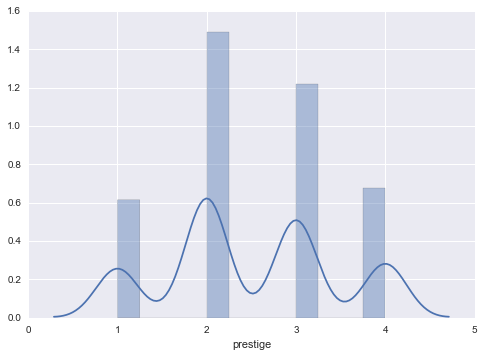

In [12]:
# plot the distribution of each variable 

sns.distplot(df_1["prestige"]);

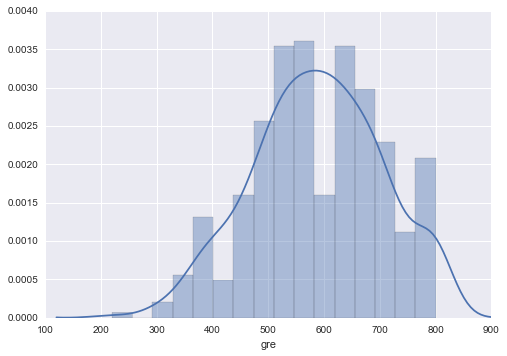

In [13]:
sns.distplot(df_1["gre"]);

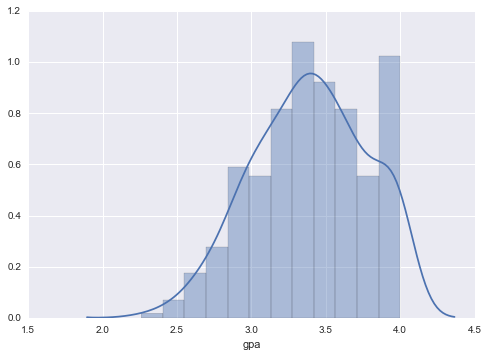

In [14]:
sns.distplot(df_1["gpa"]);

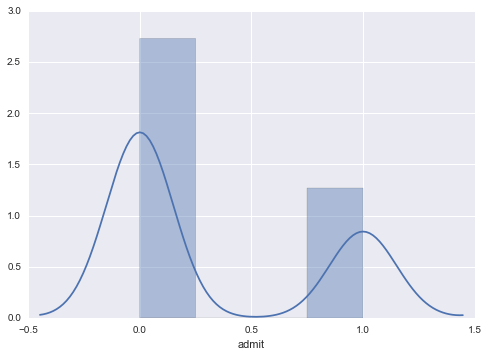

In [15]:
sns.distplot(df_1["admit"]);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The GRE and GPA scores are normally distributed but the admit data is not.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No because admit is a categorical variable (1, 0), so it will not have a normal distribution.

#### Question 11. Which of our variables are potentially colinear? 

In [17]:
# create a correlation matrix for the data

df_1.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the values are highly correlated. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1) Check the summary stats for GRE scores and prestige data
2) Check the distribution for the GRE scores and prestige data
3) Check for outliers by calculating the skewness and kurtosis

#### Question 14. What is your hypothesis? 

Answer: GRE, GPA and prestige alone do not predict admission results.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data